## Churn Prediction Using Machine Learning

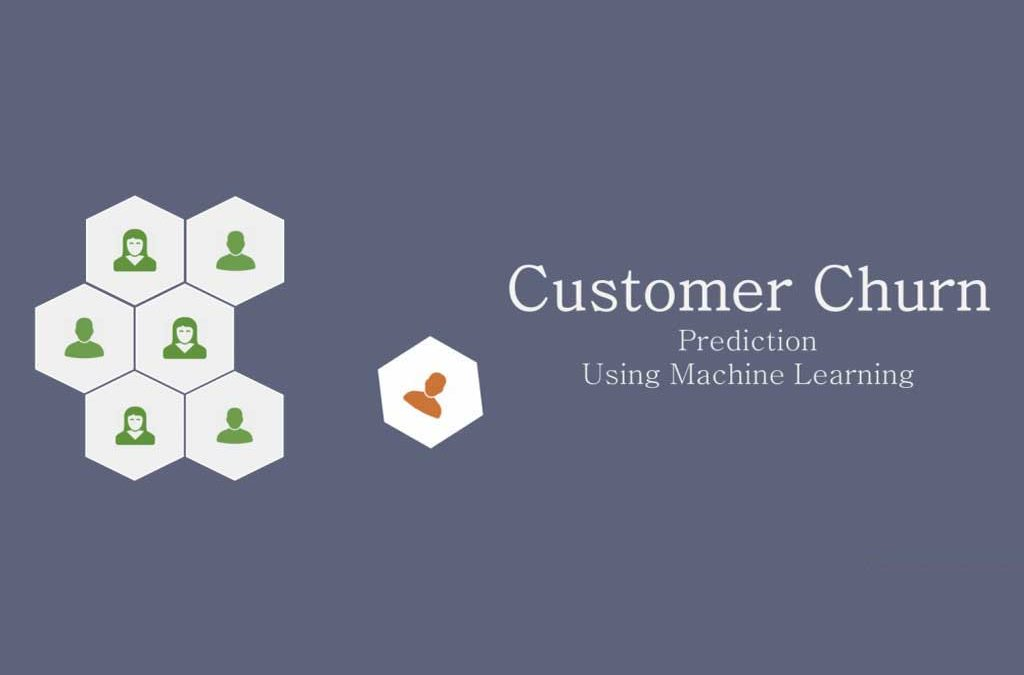

## Introduction:
A partiular bank wants to analyze the past data and predict whether the customer will churn or not in the next 6 months.

## Aim:

-Classify if a customer is going to churn or not in the next six month.

-Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn.

## Details about the dataset:

This dataset contains 73150 observations and 11 variables. Independent variables contain information about customers. Dependent variable refers to customer abandonment status.

### Variables:

ID — Unique Identifier of a row.

Age — Age of the customer.

Gender — Gender of the customer(Male/Female).

Income — Yearly income of the customer.

Balance — Average quaterly balance of the customer.

Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank. We’ll include this column, too.

Vintage — Number of years customer is associated with banks.

Transaction_Status — Whether the customer has done any transaction in the past 3 months or not.

Product_Holdings — No. of product holdings with the bank.

Credit_Card — Whether the customer has a credit card or not.

Credit_Category — Category of a customer based on the credit score

Is_Churn — whether the customer will churn in the next 6 months or not 

## Prediction:

## Import the libraries

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
import xgboost
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier
import catboost as cb
from sklearn.ensemble import GradientBoostingClassifier
import itertools
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

## Import the datset

In [218]:
df = pd.read_csv('train_PDjVQMB.csv')

## Check the first five rows

In [219]:
df.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


## Info of the data

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


#Check the shape of the data

In [10]:
df.shape

(6650, 11)

## Size of the data

In [477]:
df.size

73150

## Descriptive Summary

In [480]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6650.0,41.130226,9.685747,21.0,34.0000,40.000,47.00,72.00
Balance,6650.0,804595.354985,515754.867315,63.0,392264.2125,764938.575,1147123.71,2436615.81
Vintage,6650.0,2.250226,1.458795,0.0,1.0000,2.000,3.00,5.00
Transaction_Status,6650.0,0.515789,0.499788,0.0,0.0000,1.000,1.00,1.00
Credit_Card,6650.0,0.664361,0.472249,0.0,0.0000,1.000,1.00,1.00
Is_Churn,6650.0,0.231128,0.421586,0.0,0.0000,0.000,0.00,1.00


## Missing value in the data

In [481]:
df.isnull().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

## Drop the unwanted ID Column

In [221]:
df=df.drop(["ID"],axis=1) 

In [13]:
df.dtypes

Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
Is_Churn                int64
dtype: object

In [ ]:
df1.select_dtypes(include='object').head()

## Check the Unique values in the categorical variables

In [223]:
#Unique values in each categorical variable:
print(df["Gender"].nunique())
print(df["Income"].unique())
print(df["Vintage"].unique())
print(df["Transaction_Status"].nunique())
print(df["Product_Holdings"].unique())
print(df["Credit_Card"].unique())
print(df["Credit_Category"].unique())
print(df["Is_Churn"].unique())

2
['5L - 10L' 'Less than 5L' 'More than 15L' '10L - 15L']
[4 2 0 1 3 5]
2
['1' '2' '3+']
[0 1]
['Average' 'Poor' 'Good']
[1 0]


## Check for the duplicate rows

In [224]:
df.duplicated().sum()

0

## Check for the data imbalance in the target variable

In [225]:
df["Is_Churn"].value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

## EDA

In [226]:
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go # visualization
trace = go.Pie(labels = df["Is_Churn"].value_counts().keys().tolist(),
               values = df["Is_Churn"].value_counts().values.tolist(),
               marker = dict(colors = ['LightSkyBlue','MediumPurple'],
                             line = dict(color = "white", width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer churn in the data",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

#### 23.1% of the customer churn in the data

<AxesSubplot:xlabel='Income', ylabel='count'>

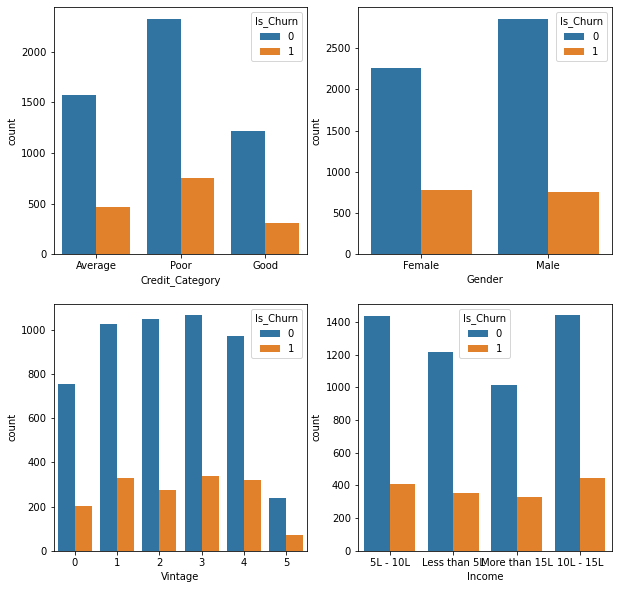

In [245]:
 # We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(10, 10))
sns.countplot(x='Credit_Category', hue = 'Is_Churn',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Is_Churn',data = df, ax=axarr[0][1])
sns.countplot(x='Vintage', hue = 'Is_Churn',data = df, ax=axarr[1][0])
sns.countplot(x='Income', hue = 'Is_Churn',data = df, ax=axarr[1][1])

<AxesSubplot:xlabel='Product_Holdings', ylabel='count'>

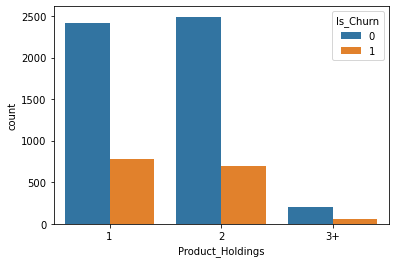

In [247]:
sns.countplot(x='Product_Holdings', hue = 'Is_Churn',data = df)

<AxesSubplot:xlabel='Transaction_Status', ylabel='count'>

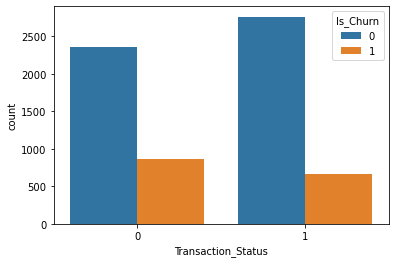

In [248]:
sns.countplot(x='Transaction_Status', hue = 'Is_Churn',data = df)

<AxesSubplot:xlabel='Credit_Card', ylabel='count'>

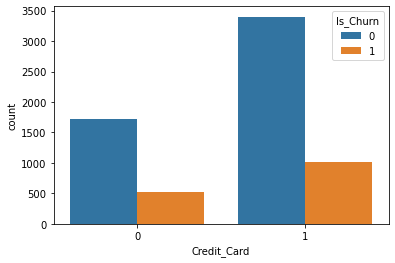

In [249]:
sns.countplot(x='Credit_Card', hue = 'Is_Churn',data = df)

<AxesSubplot:xlabel='Is_Churn', ylabel='Age'>

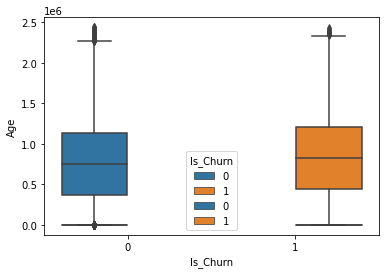

In [261]:
# Relations based on the continuous data attributes
sns.boxplot(y='Age',x = 'Is_Churn', hue = 'Is_Churn',data = df)

<AxesSubplot:xlabel='Is_Churn', ylabel='Balance'>

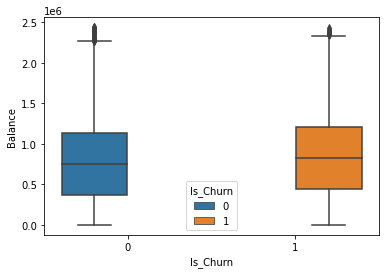

In [262]:
sns.boxplot(y='Balance',x = 'Is_Churn', hue = 'Is_Churn',data = df) 

## Correlation between the variables

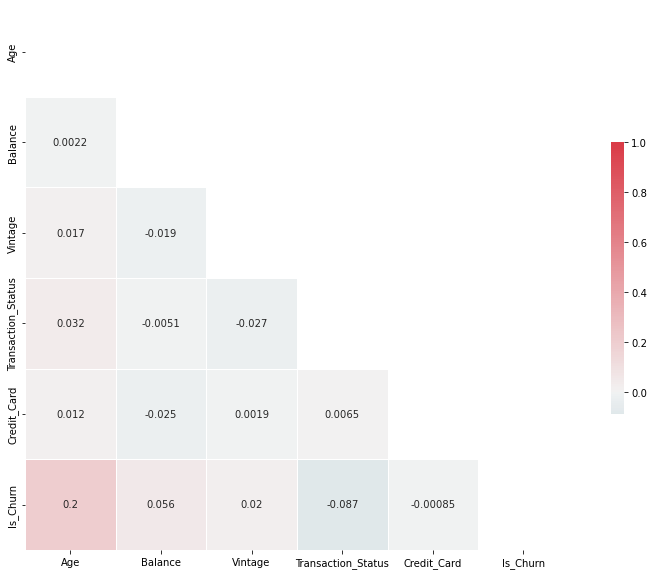

In [18]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

#### variables are weakly correlated

## Feature Engineering

In [93]:
df['Product_Holdings']=np.where(df['Product_Holdings'] =='3+', '3', df['Product_Holdings'])

In [94]:
#label encodig the ordinal variables
df['Income']=np.where(df['Income'] =='5L - 10L', '1', df['Income'])
df['Income']=np.where(df['Income'] =='Less than 5L', '0', df['Income'])
df['Income']=np.where(df['Income'] =='More than 15L', '3', df['Income'])
df['Income']=np.where(df['Income'] =='10L - 15L', '2', df['Income'])

In [95]:
#label encodig the ordinal variables
df['Credit_Category']=np.where(df['Credit_Category'] =='Average', '1', df['Credit_Category'])
df['Credit_Category']=np.where(df['Credit_Category'] =='Poor', '0', df['Credit_Category'])
df['Credit_Category']=np.where(df['Credit_Category'] =='Good', '2', df['Credit_Category'])

In [96]:
df['Income']=df['Income'].astype('int64')

In [97]:
df['Product_Holdings']=df['Product_Holdings'].astype('int64')

In [98]:
df['Credit_Category']=df['Credit_Category'].astype('int64')

## One-Hot Encoding

In [263]:
df = pd.get_dummies(df, columns=['Gender'],drop_first=True)

## Declare feature vector and target variable

In [101]:
df1 = df.copy()

In [102]:
df1.head()

,Age,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,Gender_Male
0,36,1,563266.44,4,0,1,0,1,1,0
1,53,0,875572.11,2,1,1,1,0,0,0
2,35,3,701607.06,2,1,2,0,0,0,0
3,43,3,1393922.16,0,1,2,1,0,1,0
4,39,3,893146.23,1,1,1,1,2,1,0


In [103]:
X = df1.drop("Is_Churn", axis=1)
y = df1.pop("Is_Churn")

## Train-test Split 

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=45)

## Take care of data imbalance with SMOTEENN

In [109]:
df2=df.copy()
df2.head()

,Age,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,Gender_Male
0,36,1,563266.44,4,0,1,0,1,1,0
1,53,0,875572.11,2,1,1,1,0,0,0
2,35,3,701607.06,2,1,2,0,0,0,0
3,43,3,1393922.16,0,1,2,1,0,1,0
4,39,3,893146.23,1,1,1,1,2,1,0


In [110]:
from imblearn.combine import SMOTEENN

In [112]:
X = df2.drop("Is_Churn", axis=1)
y = df2.pop("Is_Churn")

In [113]:
sm1 = SMOTEENN()
X_resampled, y_resampled = sm1.fit_sample(X, y)

In [114]:
Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_resampled,y_resampled,test_size=.30,random_state=45)

## Random Forest

In [119]:
rfcl=RandomForestClassifier(n_estimators=500, oob_score=True, random_state = 1)

In [120]:
rfcl_1=rfcl.fit(X_train,y_train)

In [121]:
rfcl_1.score(X_train,y_train)

1.0

In [122]:
rfcl_1.score(X_test,y_test)

0.7699248120300752

## Hypertuning the Parameters

In [123]:
#Hypertuning
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [124]:
#Create RandomGrid
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth' : max_depth,
'min_samples_split' : min_samples_split,
'min_samples_leaf' : min_samples_leaf }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [126]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error',n_iter = 10, cv = 5, verbose = 2,random_state = 50,n_jobs = 1)

In [127]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=50, scoring='neg_mean_squared_error',
                   verbose=2)

In [128]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 100,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 25}

In [129]:
best_grid_1 = rf_random.best_estimator_

## Variable Importance 

In [130]:
#Variable Importance
print (pd.DataFrame(best_grid_1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                         Imp
Age                 0.473998
Balance             0.241657
Vintage             0.060848
Transaction_Status  0.057511
Income              0.045996
Credit_Category     0.037627
Gender_Male         0.033704
Product_Holdings    0.032668
Credit_Card         0.015990


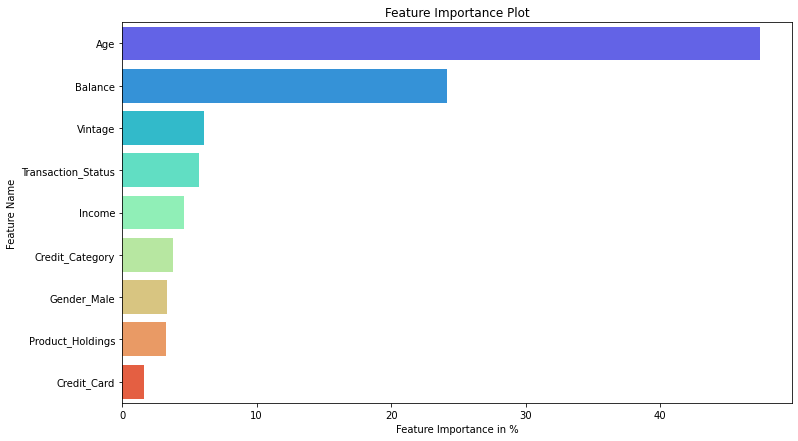

In [132]:
x=pd.DataFrame(best_grid_1.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [133]:
best_grid_1.score(X_train,y_train)
print('Accuracy Score for train data:',best_grid_1.score(X_train,y_train))

Accuracy Score for train data: 0.7707841031149302


In [134]:
best_grid_1.score(X_test,y_test)
print('Accuracy Score for test data:',best_grid_1.score(X_test,y_test))

Accuracy Score for test data: 0.7779448621553885


##  Hypertuning with SMOTEENN

In [135]:
rf_random.fit(Xr_train, yr_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=50, scoring='neg_mean_squared_error',
                   verbose=2)

In [138]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 25}

In [139]:
best_grid_2 = rf_random.best_estimator_

In [140]:
best_grid_2.score(Xr_train,yr_train)
print('Accuracy Score for train data:',best_grid_2.score(Xr_train,yr_train))

Accuracy Score for train data: 1.0


In [141]:
best_grid_2.score(Xr_test,yr_test)
print('Accuracy Score for test data:',best_grid_2.score(Xr_test,yr_test))

Accuracy Score for test data: 0.7551020408163265


## XGBoost Classifier with SMOTE-ENN

In [142]:
# Hyper Parameter Optimization wit XG Boost Classifier

Params = {
    "learning_rate": [0.01,0.10,0.15,0.20,0.25,0.30],
    "max_depth": [3,4,5,6,8,10,12,15],
    "min_child_weight": [1,3,5,7],
    "gamma": [0.0, 0.1,0.2,0.3,0.4],
    "colsample_bytree": [0.3,0.4,0.5,0.7]
}

xgb = XGBClassifier(random_state = 45)

grid_search11 = RandomizedSearchCV(estimator = xgb, param_distributions = Params,cv = 15,n_jobs = -1, verbose = 3, scoring = 'accuracy')

In [143]:
grid_search11.fit(Xr_train, yr_train)

Fitting 15 folds for each of 10 candidates, totalling 150 fits
[19:22:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=15,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraint...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                       

In [144]:
grid_search11.best_params_

{'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.1,
 'gamma': 0.0,
 'colsample_bytree': 0.4}

In [145]:
best_grid_XGB = grid_search11.best_estimator_

In [147]:
print('Accuracy Score for train data:',best_grid_XGB.score(Xr_train,yr_train))

Accuracy Score for train data: 0.9515713549716641


In [149]:
print('Accuracy Score for test data:',best_grid_XGB.score(Xr_test,yr_test))

Accuracy Score for test data: 0.8319327731092437


## Cat Boost Classifier with SMOTE-ENN

In [150]:
clf4 = CatBoostClassifier(
            n_estimators = 25000,
            task_type = 'CPU',
            one_hot_max_size = 2,
            random_seed = 31,
            loss_function = 'CrossEntropy',
            learning_rate = 0.5,
            max_depth = 6,
            colsample_bylevel = 0.6,
            bagging_temperature = 28.635664398579774,
            random_strength = 100.0,
            reg_lambda = 250.0,
            early_stopping_rounds=5000,
    )

In [151]:
clf4.fit(Xr_train, yr_train,  
        eval_set=(Xr_test, yr_test), 
        verbose=False
)

In [152]:
print('Accuracy Score for train data:',clf4.score(Xr_train,yr_train))

Accuracy Score for train data: 0.9335394126738794


In [153]:
print('Accuracy Score for test data:',clf4.score(Xr_test,yr_test))

Accuracy Score for test data: 0.7791116446578632


## Gradient Boost Classifier with SMOTE-ENN

In [170]:
# Hypertuning Gradient Boosting Classifier
parameters = {
    "n_estimators":[500,1000,1500,2000,2500,3000],
    "max_depth":[2,3,5,7],
    "learning_rate":[0.1,0.3],
    "ccp_alpha":[0.0000001],
    "loss": ['exponential'],
    "tol": [0.00001]
    
}
gbc_f = GradientBoostingClassifier(random_state = 45)
grid_search12 = RandomizedSearchCV(estimator = gbc_f, param_distributions = parameters,cv = 10,n_jobs = -1)

In [171]:
grid_search12.fit(Xr_train, yr_train.ravel())

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=45),
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [1e-07],
                                        'learning_rate': [0.1, 0.3],
                                        'loss': ['exponential'],
                                        'max_depth': [2, 3, 5, 7],
                                        'n_estimators': [500, 1000, 1500, 2000,
                                                         2500, 3000],
                                        'tol': [1e-05]})

In [172]:
grid_search12.best_params_

{'tol': 1e-05,
 'n_estimators': 3000,
 'max_depth': 2,
 'loss': 'exponential',
 'learning_rate': 0.3,
 'ccp_alpha': 1e-07}

In [173]:
best_grid_81 = grid_search12.best_estimator_

In [174]:
print('Accuracy Score for train data:',best_grid_81.score(Xr_train,yr_train))

Accuracy Score for train data: 1.0


In [175]:
print('Accuracy Score for test data:',best_grid_81.score(Xr_test,yr_test))

Accuracy Score for test data: 0.9375750300120048


## Prediction

In [215]:
yrtrain_predict = best_grid_81.predict(Xr_train)
yrtest_predict = best_grid_81.predict(Xr_test)

## Classification report for train data

In [216]:
print(classification_report(yr_train, yrtrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       934
           1       1.00      1.00      1.00      1007

    accuracy                           1.00      1941
   macro avg       1.00      1.00      1.00      1941
weighted avg       1.00      1.00      1.00      1941



## Classification report for test data

In [194]:
print(classification_report(yr_test, yrtest_predict))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       372
           1       0.96      0.93      0.94       461

    accuracy                           0.94       833
   macro avg       0.94      0.94      0.94       833
weighted avg       0.94      0.94      0.94       833



## Confusion matrix for train data 

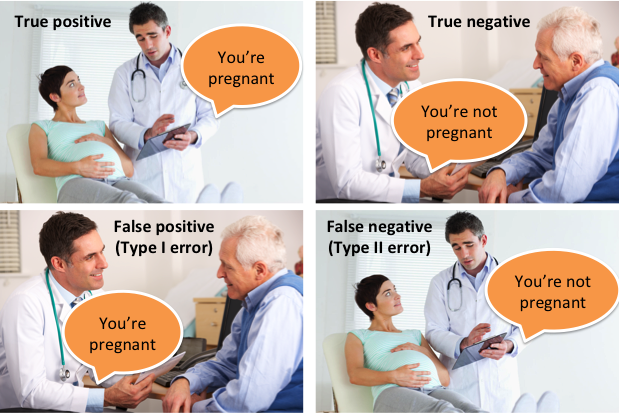

In [198]:
confusion_matrix(yr_train, yrtrain_predict)

array([[ 934,    0],
       [   0, 1007]], dtype=int64)

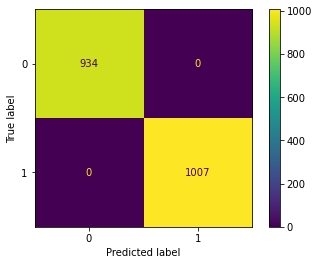

In [204]:
plot_confusion_matrix(best_grid_81,Xr_train,yr_train);

## Confusion matrix for test data 

In [206]:
confusion_matrix(yr_test, yrtest_predict)

array([[353,  19],
       [ 33, 428]], dtype=int64)

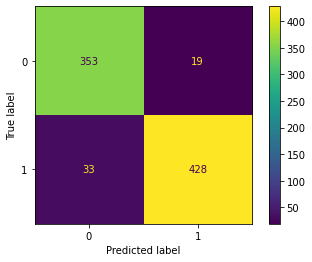

In [205]:
plot_confusion_matrix(best_grid_81,Xr_test,yr_test);

## ROC_curve and ROC_AUC_score for train data 

In [212]:
yrtrain_predict_prob =best_grid_81.predict_proba(Xr_train)
pd.DataFrame(yrtrain_predict_prob).head()

,0,1
0,0.030269,0.969731
1,0.001766,0.998234
2,0.998275,0.001725
3,0.000015,0.999985
4,0.999906,0.000094


Area under Curve is 1.0


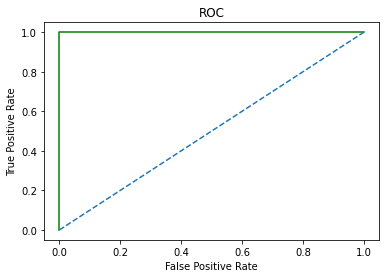

In [210]:
best_grid_81_train_fpr, best_grid_81_train_tpr,_=roc_curve(yr_train,best_grid_81.predict_proba(Xr_train)[:,1])
plt.plot(best_grid_81_train_fpr,best_grid_81_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
best_grid_81_train_auc=roc_auc_score(yr_train,best_grid_81.predict_proba(Xr_train)[:,1])
print('Area under Curve is', best_grid_81_train_auc)

## ROC_curve and ROC_AUC_score for test data 

In [208]:
yrtest_predict_prob =best_grid_81.predict_proba(Xr_test)
pd.DataFrame(yrtest_predict_prob).head()

,0,1
0,4.246539e-07,1.000000
1,9.789299e-01,0.021070
2,9.992979e-01,0.000702
3,9.999968e-01,0.000003
4,9.848281e-01,0.015172


Area under Curve is 0.9752583210878641


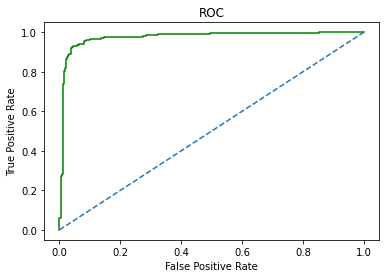

In [214]:
best_grid_81_test_fpr,best_grid_81_test_tpr,_=roc_curve(yr_test,best_grid_81.predict_proba(Xr_test)[:,1])
plt.plot(best_grid_81_test_fpr,best_grid_81_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
best_grid_81_test_auc=roc_auc_score(yr_test,best_grid_81.predict_proba(Xr_test)[:,1])
print('Area under Curve is', best_grid_81_test_auc)

## Reporting

The aim of this study was to create classification models for the churn dataset wihtout over-fitting. The work done is as follows:

1) Churn Data Set read

2) With Exploratory Data Analysis; The data set's structural data were checked. The types of variables in the dataset were examined. Size information of the dataset was accessed. Descriptive statistics of the data set were examined. It was concluded that there were no missing observations and duplicates in the data set.

4) During Model Building; Random Forests, XGBoost, CatBoost and Gradient boost algorithm ware used to check for maximum accuracy. Hyperparameter optimizations with SMOTE-ENN has been done to increase Accuracy score.

5) Result: The model created as a result of Gradient Bost hyperparameter optimization with SMOTE-ENN became the model with the maximum Accuracy Score. (0.9375)

From the above results, my main aim is to predict the customers that will possibly churn, hence the precision measures on the 1's is of more importance to me than the overall accuracy score of the model.

From the review of the fitted models above, the best model that gives a decent balance of the recall and precision is the hypeer-tuned gradient boosting classification method with SMOTT-ENN, where according to the fit on the training set, the precision score on 1's is 0.1 and according to the fit on the testing set, the precision score on 1's is 0.91.The model is able to highlight 91% of all those customers who will churn.